# 📋 Summative Assessment 2
## 🔏Monfero, John Benedict A.
*Github File Link:* 

<h1><center> 🌟 Data Description 🌟

<center><b>Mice are used in an experiment to test drugs that may prevent Alzheimer’s disease. Half the mice are transgenic – have been genetically modified to have Alzheimer’s disease. The other half of the mice are “wild type” – they have not been modified in any way, and are considered free of Alzheimer’s disease. The mice are assigned to treatment conditions and given one of four drugs, then tested on memory using a maze. The number of errors made in the maze is recorded for the Training Day and the Memory Day.

<h2><center> 💥 Directions 💥

> **Analyze data using a 2-Factor (2B) ANOVA. (Just choose one of the two below. If you choose two, the other one will be considered a bonus item wit a maximum of 15 points.)**
>
> 1. **Compare the training day errors based on drug treatments and AD status.**
>
> 2. **Compare the memory day errors based on drug treatments and AD status.**

<h3><center> 💎 I choose the bonus item route with maximum of 15 points 💎

> **Compare the memory day errors based on drug treatments and AD status.**

### Step 1: Import neccesary Libraries to the entire tasks!

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import lilliefors
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
Alzheimers_Mice_Data = pd.read_csv(r"Alzheimers Mice Data.csv")
Alzheimers_Mice_Data

,AD_Status,Treatment,Training,Memory
0,1,1,12,10
1,1,1,15,12
2,1,1,13,13
3,1,1,12,10
4,1,1,14,13
5,1,2,15,13
6,1,2,17,13
7,1,2,16,14
8,1,2,17,15
9,1,2,14,11


### Step 2: Enumerate the Assumptions for 2B ANOVA

##### 2.1: Your dependent variable should be measured at the continuous level(i.e., they are interval or ratio variables).
##### 2.2: Your two independent variables should each consist of two or more categorical, independent groups.
##### 2.3: You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves.
##### 2.4: There should be no significant outliers.
##### 2.5: Your dependent variable should be approximately normally distributed for each combination of the groups of the two independent variables.
##### 2.6: There needs to be homogeneity of variances for each combination of the groups of the two independent variables.

### Step 3: the Data and its Assumption Checks!

##### 3.1 Assumption Check: Dependent variable should be continuous (`Memory errors`)

In [3]:
print("Assumption Check: Dependent variable should be continuous (Memory errors)")
print(f"Memory column data type: {Alzheimers_Mice_Data['Memory'].dtype}")

Assumption Check: Dependent variable should be continuous (Memory errors)
Memory column data type: int64


##### 3.2 Assumption Check: Independent variables should be categorical and have two or more groups

In [4]:
print("\nAssumption Check: Independent variables should be categorical and have two or more groups")
print(f"AD_Status unique values: {Alzheimers_Mice_Data['AD_Status'].unique()}")
print(f"Treatment unique values: {Alzheimers_Mice_Data['Treatment'].unique()}")


Assumption Check: Independent variables should be categorical and have two or more groups
AD_Status unique values: [1 2]
Treatment unique values: [1 2 3 4]


##### 3.3 Assumption Check: Independence of observations

In [5]:
# This assumption is usually checked based on the study design.
# We assume independence and non-biased gathering of data here.

##### 3.4 Assumption Check: Checking Outliers


Assumption Check: No significant outliers


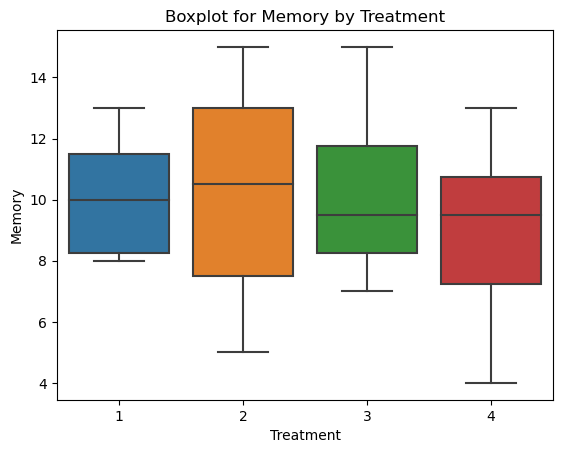

In [6]:
print("\nAssumption Check: No significant outliers")
sns.boxplot(x='Treatment', y='Memory', data=Alzheimers_Mice_Data)
plt.title('Boxplot for Memory by Treatment')
plt.show()


Assumption Check: No significant outliers


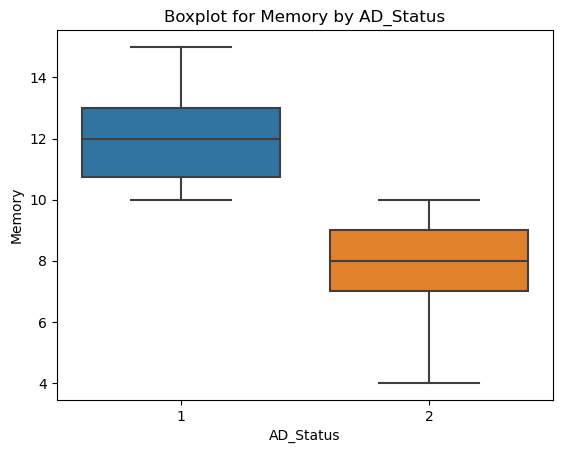

In [7]:
print("\nAssumption Check: No significant outliers")
sns.boxplot(x='AD_Status', y='Memory', data=Alzheimers_Mice_Data)
plt.title('Boxplot for Memory by AD_Status')
plt.show()

##### 3.5 Assumption Check: Normality Check

In [8]:
# Assumption Check: Dependent variable should be approximately normally distributed for each combination of groups
print("\nAssumption Check: Normality of dependent variable for each combination of groups")
combinations = Alzheimers_Mice_Data.groupby(['AD_Status', 'Treatment'])
for name, group in combinations:
    stat, p = lilliefors(group['Memory'])
    print(f'Group {name}: Lilliefors test p-value = {p}')


Assumption Check: Normality of dependent variable for each combination of groups
Group (1, 1): Lilliefors test p-value = 0.3820161744233932
Group (1, 2): Lilliefors test p-value = 0.4267374503575821
Group (1, 3): Lilliefors test p-value = 0.880148491256168
Group (1, 4): Lilliefors test p-value = 0.5973593600787575
Group (2, 1): Lilliefors test p-value = 0.04406607121617753
Group (2, 2): Lilliefors test p-value = 0.6007977047254092
Group (2, 3): Lilliefors test p-value = 0.5232323776599133
Group (2, 4): Lilliefors test p-value = 0.880148491256168


##### 3.6 Assumption Check: Homogeneity of variances

In [9]:
# Assumption Check: Homogeneity of variances
# Levene's test for homogeneity of variances
levene_stat, levene_p = stats.levene(Alzheimers_Mice_Data['Memory'][Alzheimers_Mice_Data['AD_Status'] == 1],
                                     Alzheimers_Mice_Data['Memory'][Alzheimers_Mice_Data['AD_Status'] == 2])
print(f"Levene's test p-value: {levene_p}")

Levene's test p-value: 0.44203326660708975


### 🏆 We can proceed with formulating the Null and Alternative Hypothesis 🏆
<center> Since all assumptions for the 2-Way ANOVA (2B ANOVA) were satisfied

#### Step 4.1: Null Hypothesis ($H_0$): 
> 4.11: $μ_\text{AD Status 1} = μ_\text{AD Status 2}$
>> Main Effect of AD Status: There is no significant difference in memory errors between the different AD status groups.
>
> 4.12: $μ_\text{Treatment 1} = μ_\text{Treatment 2} = μ_\text{Treatment 3} = μ_\text{Treatment 4}$
>> Main Effect of Treatment: There is no significant difference in memory errors between the different treatment groups.
>
> 4.13: $\text{There is no interaction effect between AD status and treatment}$
>> Interaction Effect: There is no significant interaction effect between AD status and treatment on memory errors.

#### Step 4.2: Alternative Hypothesis ($H_A$): 
> 4.21: $μ_\text{AD Status 1} \neq μ_\text{AD Status 2}$
>> Main Effect of AD Status: There is a significant difference in memory errors between at least two of the AD status groups.
>
> 4.22: $μ_\text{Treatment 1} \neq μ_\text{Treatment 2} \neq μ_\text{Treatment 3} \neq μ_\text{Treatment 4}$
>> Main Effect of Treatment: There is a significant difference in memory errors between the different treatment groups.
>
> 4.23: $\text{There is an interaction effect between AD status and treatment}$
>> Interaction Effect: There is an significant interaction effect between AD status and treatment on memory errors.

#### Step 5: Execution of 2B ANOVA MODEL

In [10]:
# Fit the 2-way ANOVA model
model = ols('Memory ~ C(AD_Status) * C(Treatment)', data=Alzheimers_Mice_Data).fit()
anova_table = anova_lm(model)

# Convert scientific notation to float format
anova_table['PR(>F)'] = anova_table['PR(>F)'].apply(lambda x: '{:.10f}'.format(x) if pd.notnull(x) else x)

anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(AD_Status),1.0,189.225,189.225000,75.313433,0.0000000006
C(Treatment),3.0,14.475,4.825000,1.920398,0.1461175825
C(AD_Status):C(Treatment),3.0,8.675,2.891667,1.150912,0.3436262581
Residual,32.0,80.400,2.512500,NaN,NaN


## Step 6: Data Intepretation

**Interpreting the Results**
The ANOVA table will provide the following columns:

> $\text{df}$: Degrees of freedom for each source of variance.
>
> $\text{sum_sq}$: Sum of squares for each source.
> 
> $\text{mean_sq}$: Mean sum of squares for each source.
> 
> $\text{F}$: F-statistic for each source.
> 
> $\text{PR(>F)}$: p-value for each source.

> + **C(AD_Status)**: Significant effect (p-value < 0.05), indicating AD status affects memory errors.
>> Take the first $H_A$ 
>>
>> **Therefore we shall perform POST-HOC TEST to determine which group of AD_Status differs**
> + **C(Treatment)**: Not significant (p-value > 0.05), indicating no significant effect of treatment on memory errors.
>> Take the second $H_0$
> + **C(AD_Status):C(Treatment)**: Not significant (p-value > 0.05), indicating no significant interaction effect.
>> Take the third $H_0$

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2      0.3  0.995 -3.0488 3.6488  False
     1      3      0.2 0.9985 -3.1488 3.5488  False
     1      4     -1.2 0.7699 -4.5488 2.1488  False
     2      3     -0.1 0.9998 -3.4488 3.2488  False
     2      4     -1.5 0.6269 -4.8488 1.8488  False
     3      4     -1.4 0.6762 -4.7488 1.9488  False
---------------------------------------------------


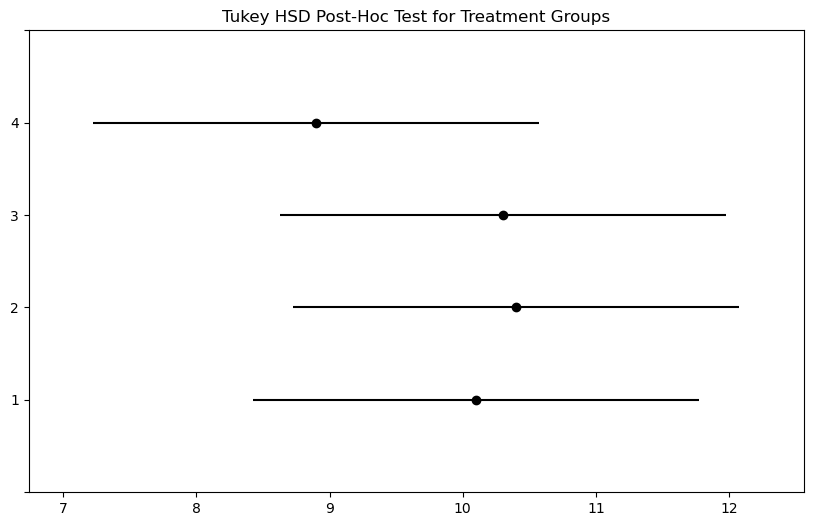

In [11]:
# Perform post-hoc analysis using Tukey's HSD test
posthoc = pairwise_tukeyhsd(Alzheimers_Mice_Data['Memory'], Alzheimers_Mice_Data['Treatment'], alpha=0.05)
print(posthoc)

# Plot the results of the post-hoc analysis
posthoc.plot_simultaneous()
plt.title('Tukey HSD Post-Hoc Test for Treatment Groups')
plt.show()

### Step 8: APA Report
##### Introduction
> This study aimed to investigate the effects of different drug treatments on memory errors in mice with and without Alzheimer's disease (AD). As the experiment involved genetically modified mice (transgenic) with Alzheimer's disease and wild-type mice without the disease. The mice were assigned to one of four drug treatments and tested on memory using a maze. **The number of errors made in the maze was recorded for both the training day and the memory day.**

##### Methodology
> The study included 40 mice as participants where: 
>> (A) The entire group was divided into four groups and each 10 mice had assigned to only one specific treatment plan
>> 
>> (B) Exactly Half of all participants has Alzheimer's disease (AD)
>> 
>> (C) Exactly Half of each 10 mice taking unique treatment plan has Alzheimer's disease (AD)

##### Design: 
> **A 2-way ANOVA was conducted to examine the effects of AD status and drug treatment on memory errors.** The independent variables were AD status (transgenic vs. wild-type) and treatment (four different drugs). The dependent variable was the number of memory errors.

##### Data Preview:

In [12]:
Alzheimers_Mice_Data.head(0)

,AD_Status,Treatment,Training,Memory


##### Assumption Checks:
> Dependent Variable Continuity: The dependent variable (`memory errors`) is continuous.
> 
> Categorical Independent Variables: Both independent variables (`AD status` and `treatment`) are categorical with two or more groups.
> 
> Independence of Observations: Assumed based on the study design.
> 
> No Significant Outliers: Boxplots were used to visually inspect for outliers.
> 
> Normality: The Lilliefors test was used to check the normality of the memory errors for each combination of AD status and treatment.
> 
> Homogeneity of Variances: Levene's test was used to check for homogeneity of variances.

##### The 2-way ANOVA results are summarized in the table below:

In [13]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(AD_Status),1.0,189.225,189.225000,75.313433,0.0000000006
C(Treatment),3.0,14.475,4.825000,1.920398,0.1461175825
C(AD_Status):C(Treatment),3.0,8.675,2.891667,1.150912,0.3436262581
Residual,32.0,80.400,2.512500,NaN,NaN


##### Result Interpretation
> **Main Effect of AD Status:** There was a significant main effect of AD status on memory errors, ( F(1, 32) = 75.31, p < .001 ).
> **Main Effect of Treatment:** There was no significant main effect of treatment on memory errors, ( F(3, 32) = 1.92, p = .146 ).
> **Interaction Effect:** There was no significant interaction effect between AD status and treatment on memory errors, ( F(3, 32) = 1.15, p = .344 ).

##### Discussion
> **The results indicate that AD status significantly affects memory errors, with transgenic mice showing more errors compared to wild-type mice. However, the different drug treatments did not significantly affect memory errors, nor was there a significant interaction between AD status and treatment. These findings suggest that while the presence of Alzheimer's disease impacts memory performance, the specific drug treatments tested did not show a significant effect in this study.**

##### Conclusion
> **This study highlights the importance of considering AD status in memory performance research. Future studies should explore additional treatments and larger sample sizes to further investigate potential therapeutic effects on memory errors in Alzheimer's disease.**